## Import Modules

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold , cross_val_score
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


## Read Data

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Getting Independent Features And Target

In [29]:

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y= df.rent

## Getting correlation between independent features and Target
for i in x:
   corr= np.corrcoef(df[i],df['rent'])
   print(corr)


[[1.        0.6383364]
 [0.6383364 1.       ]]
[[1.         0.76947441]
 [0.76947441 1.        ]]
[[1.         0.85795366]
 [0.85795366 1.        ]]
[[1.         0.03516407]
 [0.03516407 1.        ]]
[[1.         0.21586716]
 [0.21586716 1.        ]]
[[ 1.         -0.12889489]
 [-0.12889489  1.        ]]
[[ 1.        -0.1014973]
 [-0.1014973  1.       ]]
[[1.         0.03516531]
 [0.03516531 1.        ]]
[[1.         0.05387318]
 [0.05387318 1.        ]]
[[1.         0.03130205]
 [0.03130205 1.        ]]
[[1.        0.0518597]
 [0.0518597 1.       ]]
[[1.         0.05224126]
 [0.05224126 1.        ]]
[[1.         0.02930243]
 [0.02930243 1.        ]]
[[1.         0.04060863]
 [0.04060863 1.        ]]


## Correlation Matrix

<Axes: >

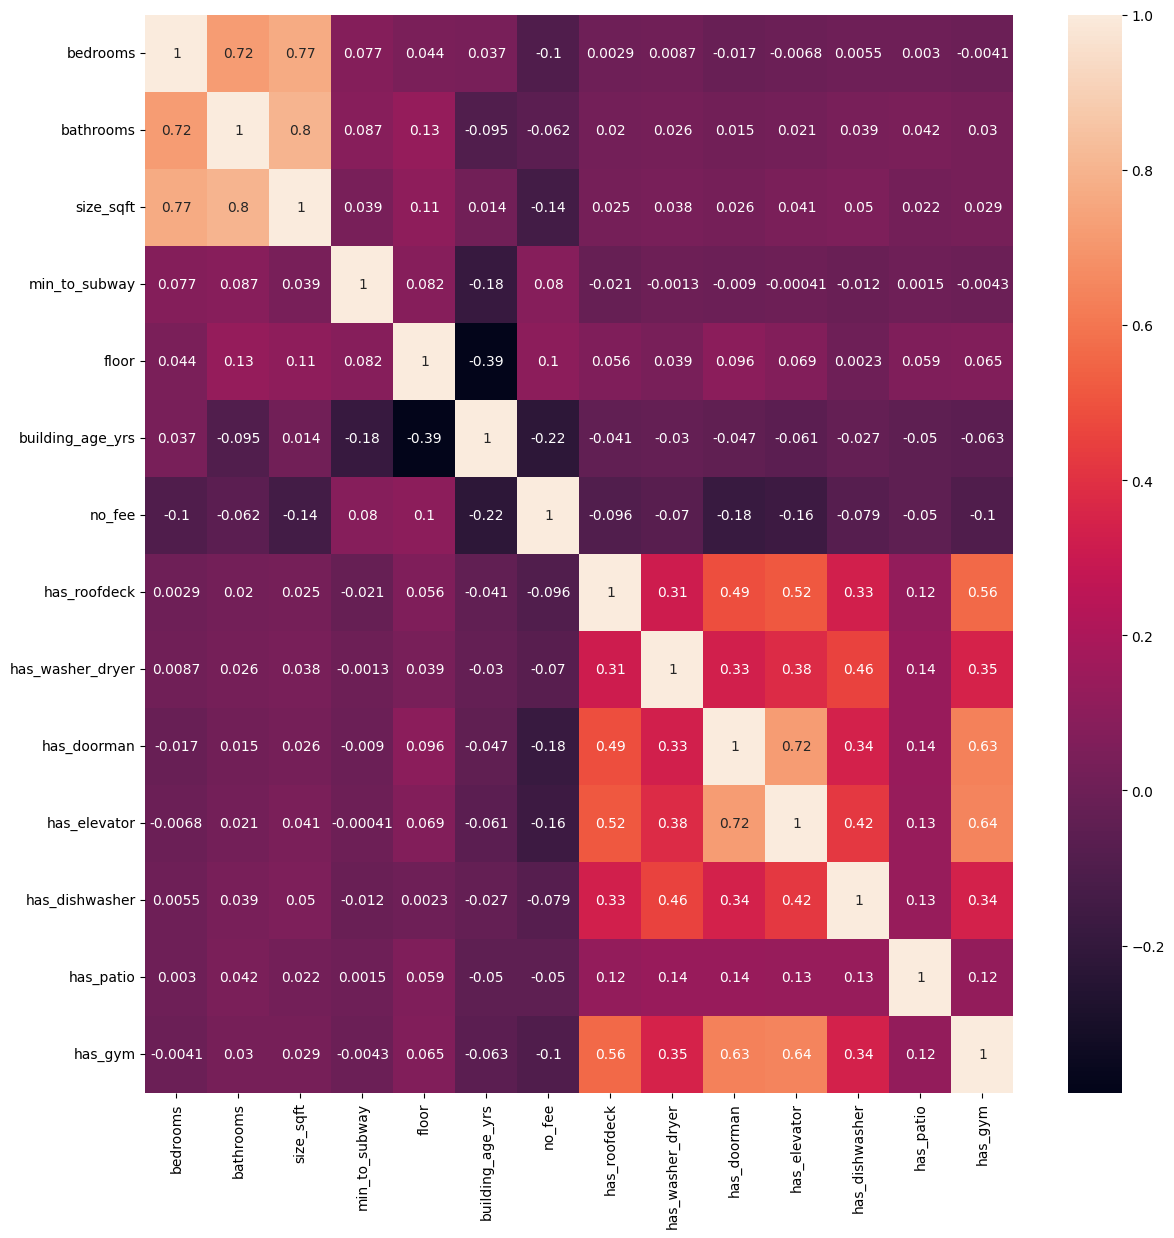

In [30]:
corr_matrix = x.select_dtypes('number').corr()
plt.figure(figsize=(corr_matrix.shape[0], corr_matrix.shape[1]))
sns.heatmap(corr_matrix, annot=True)

## Removing Highly correlated independent features 
**based on the heatmap we can see bedrooms and size_sqft are highly correlated to avoid **Multicollinearity* i will take out **bedrooms* and leave **size_sqft**

In [31]:
## removed **bedrooms**
x = df[[ 
        'bathrooms', 
        'size_sqft', 
        'min_to_subway', 
        'floor', 
        'building_age_yrs', 
        'no_fee', 
        'has_roofdeck', 
        'has_washer_dryer', 
        'has_doorman', 
        'has_elevator', 
        'has_dishwasher', 
        'has_patio', 
        'has_gym']]

## Plotting Dependent Features Against Target Feature

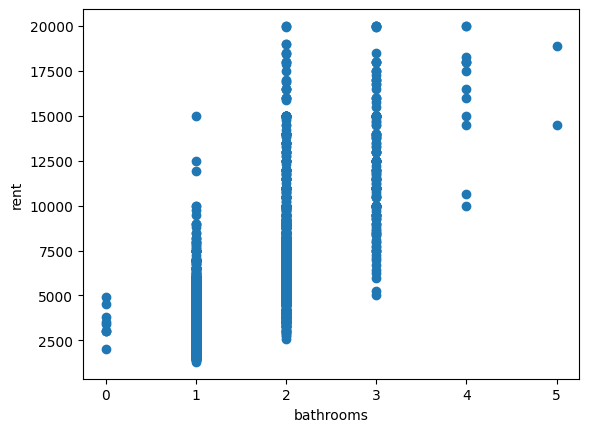

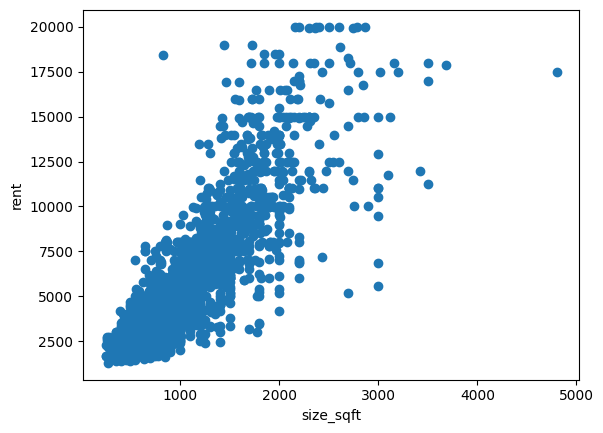

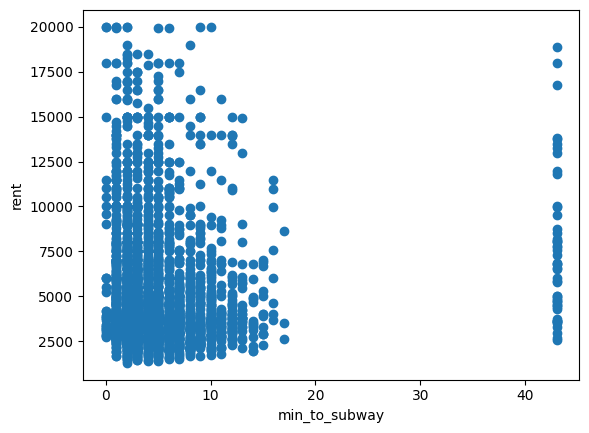

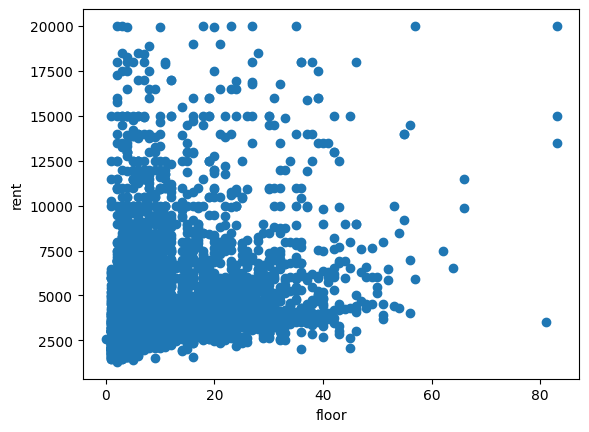

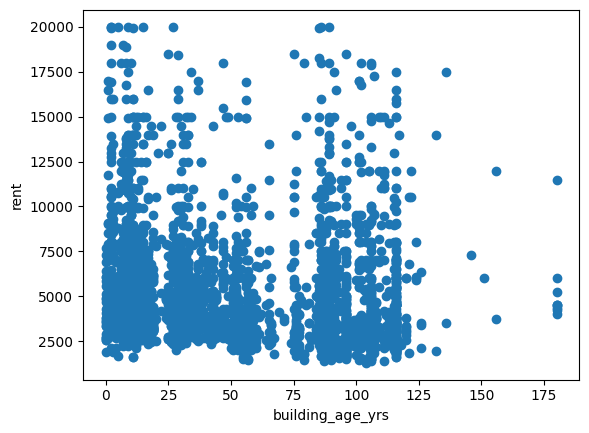

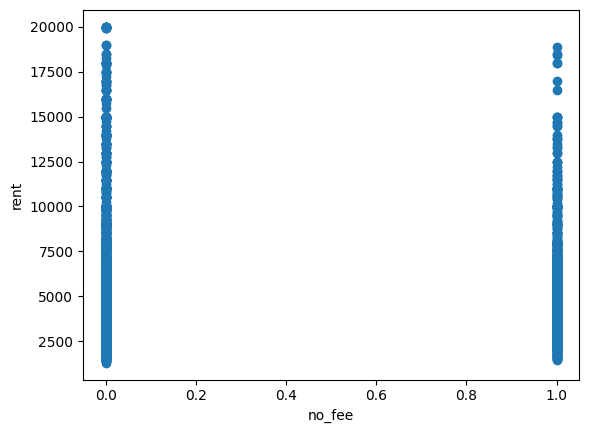

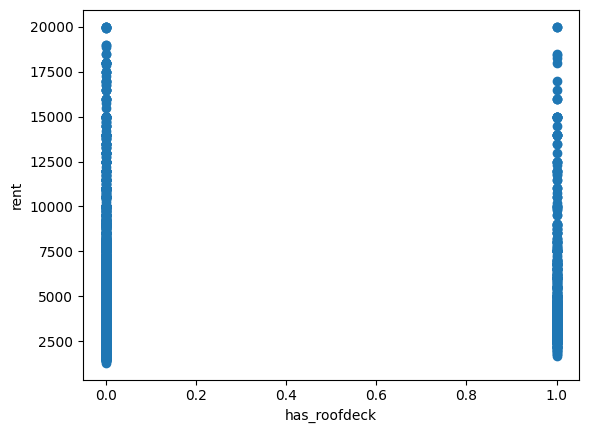

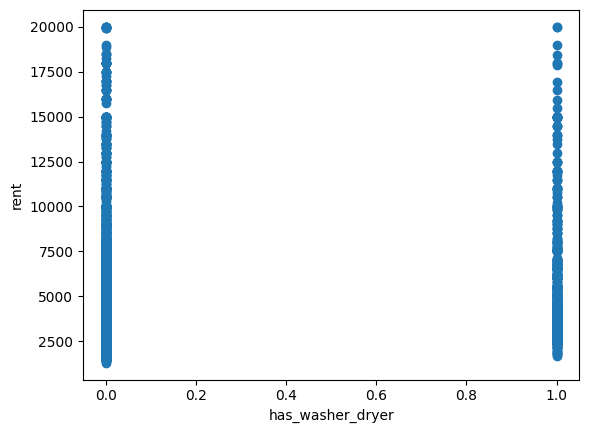

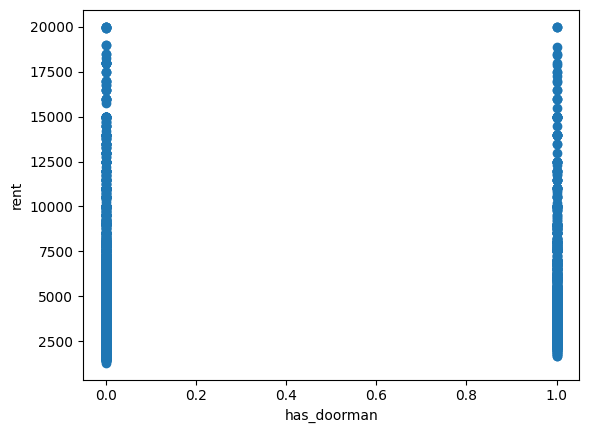

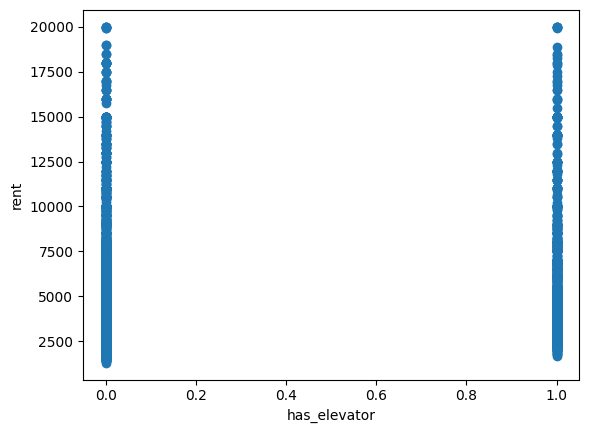

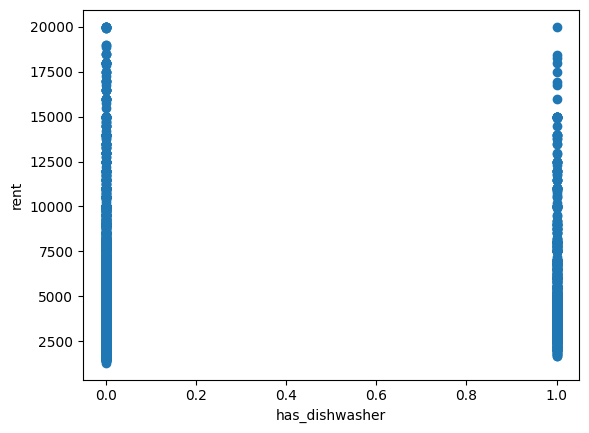

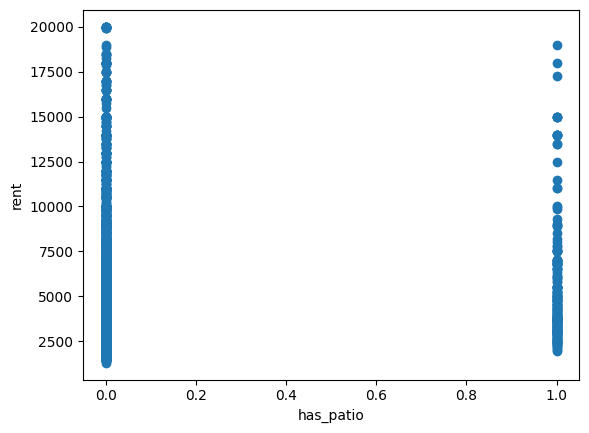

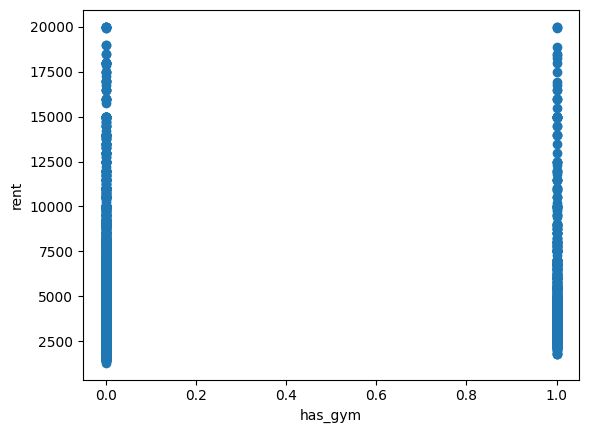

In [32]:
for i in x:
 plt.scatter(df[i],df['rent'])
 plt.xlabel(i)
 plt.ylabel('rent')
 plt.show()

## Detecting Outlliers

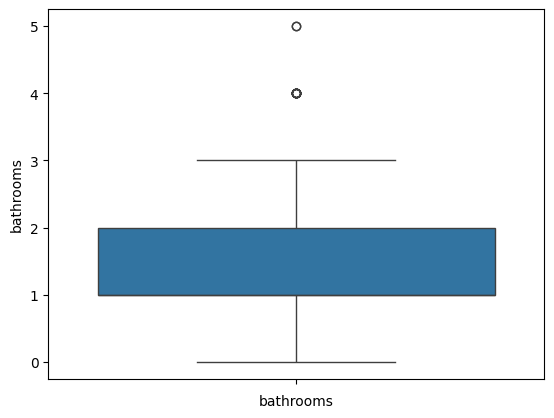

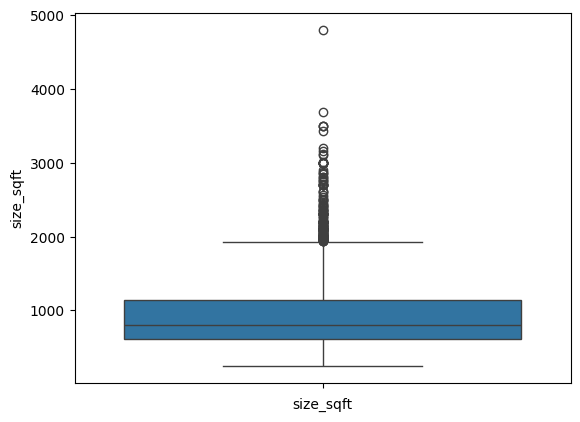

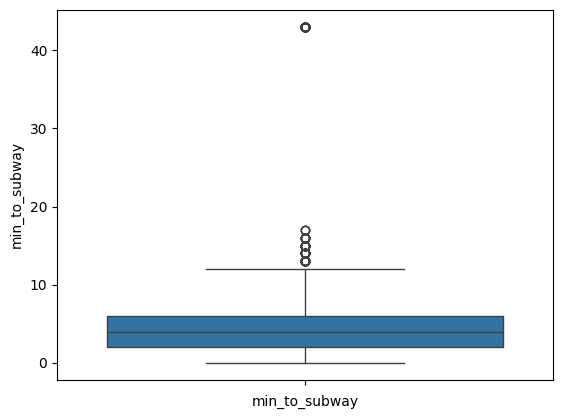

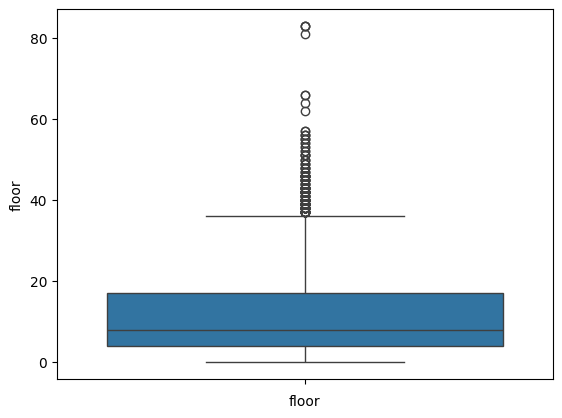

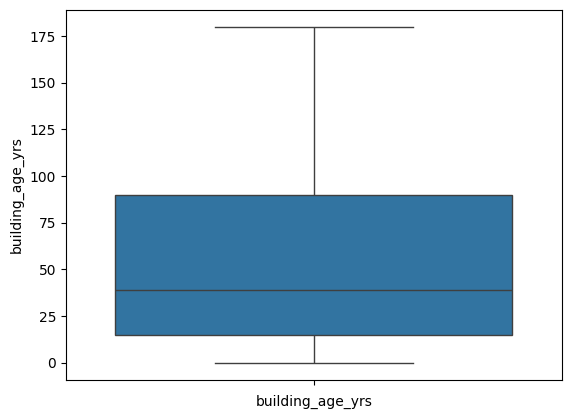

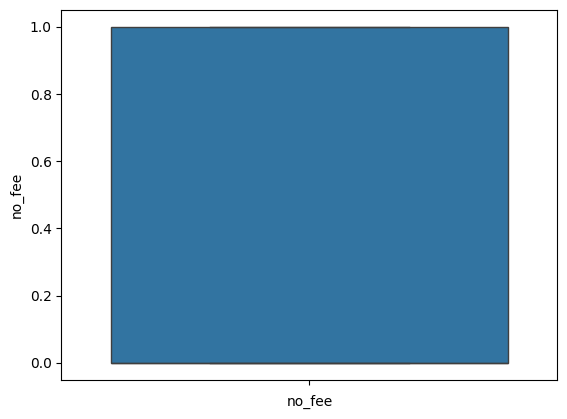

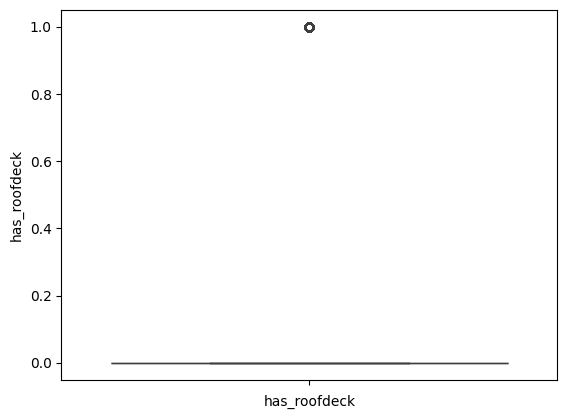

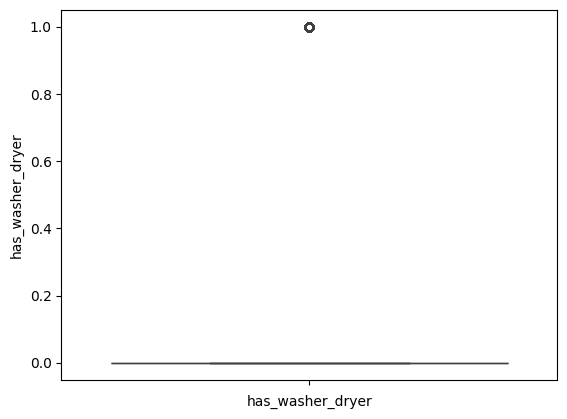

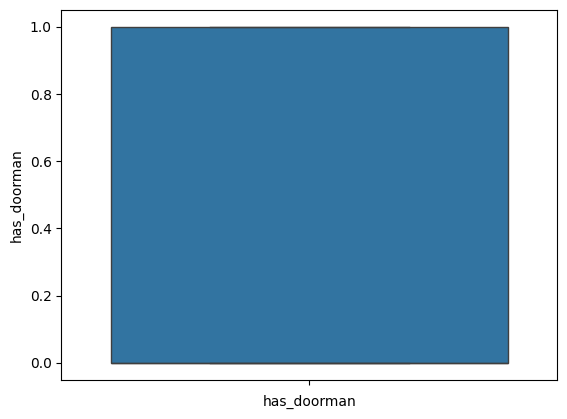

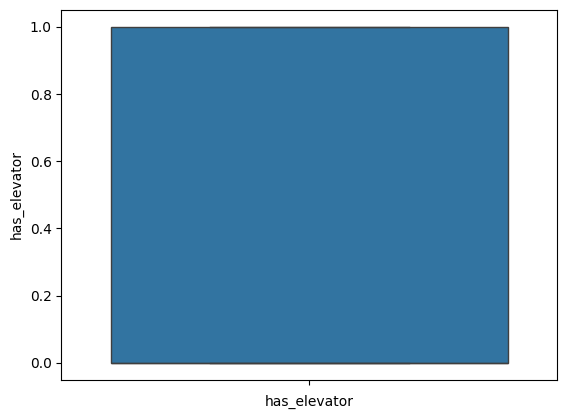

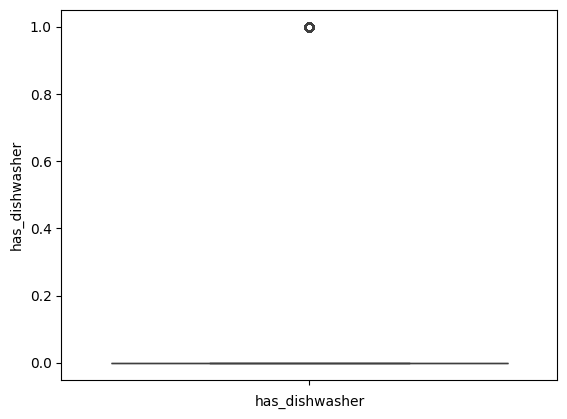

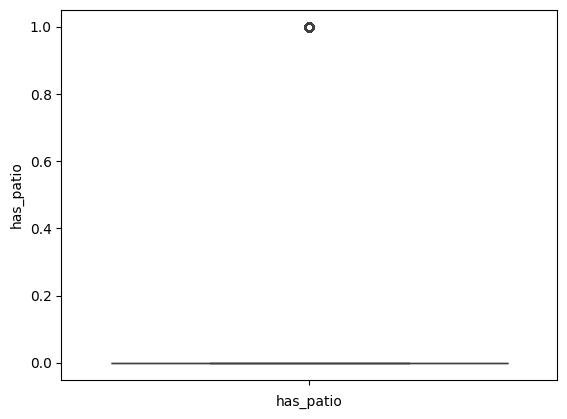

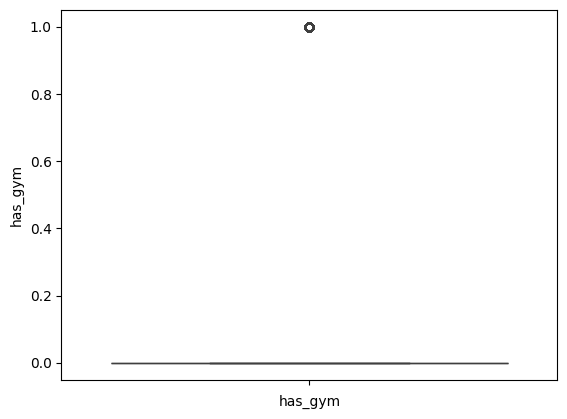

In [33]:
for i in x:
 sns.boxplot(df[i])
 plt.xlabel(i)
 plt.show()


## Detecting Null Features

<Axes: >

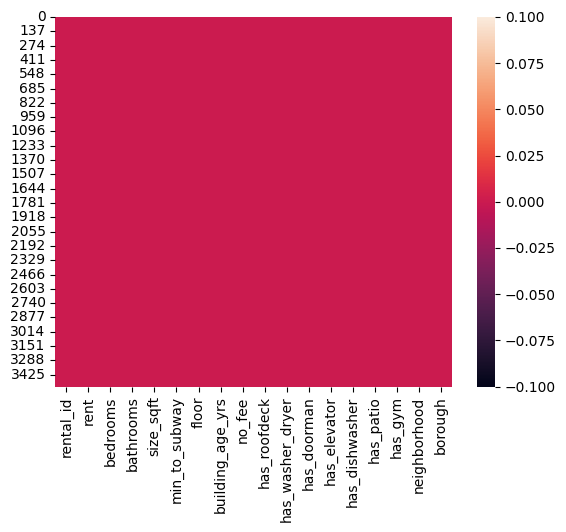

In [34]:
sns.heatmap(df.isnull())

In [35]:
df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

## Cross Validation Evaluating For The Best Model 

In [36]:
models = {
    # "Ridge": Ridge(),
    # "Lasso": Lasso(),
    "Linear Regression": LinearRegression(),
    # "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

kf=KFold(n_splits=6,shuffle=True,random_state=42)

best_score = -np.inf
best_model_name = None

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=kf)
    mean_score = np.mean(scores)
    print(f"{name}: {mean_score:.4f} (±{np.std(scores):.4f})")
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name

model = models[best_model_name]


print(f"Best model: {model}") 

Linear Regression: 0.7730 (±0.0102)
SVR: 0.0428 (±0.0245)
Best model: LinearRegression()


## Training Data and Predicting

In [37]:
final_model = model.fit(x, y)

new_data = [[
    1,      # bathrooms
    750,    # size_sqft
    5,      # min_to_subway
    2,      # floor
    10,     # building_age_yrs
    1,      # no_fee
    0,      # has_roofdeck
    1,      # has_washer_dryer
    0,      # has_doorman
    1,      # has_elevator
    1,      # has_dishwasher
    0,      # has_patio
    1       # has_gym
]]

predicted_rent = final_model.predict(new_data)
print(f"Predicted rent: ${predicted_rent[0]:.2f}")

Predicted rent: $4128.33


/opt/miniconda3/envs/deeplearning/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


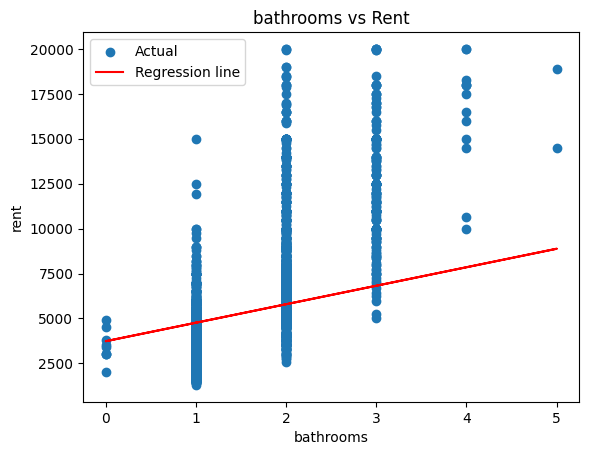

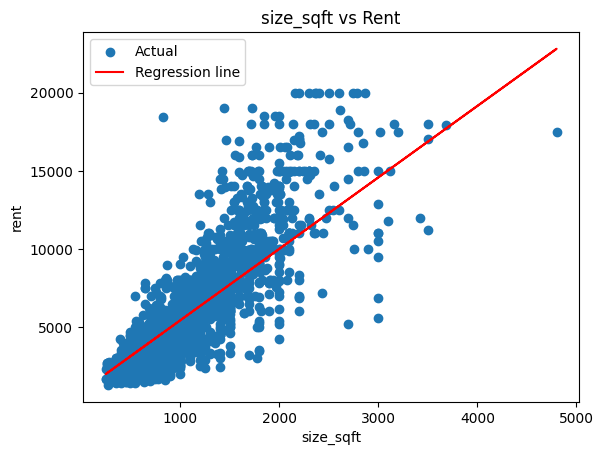

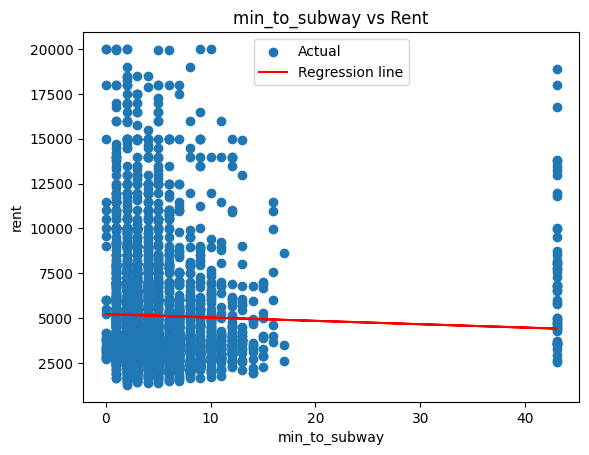

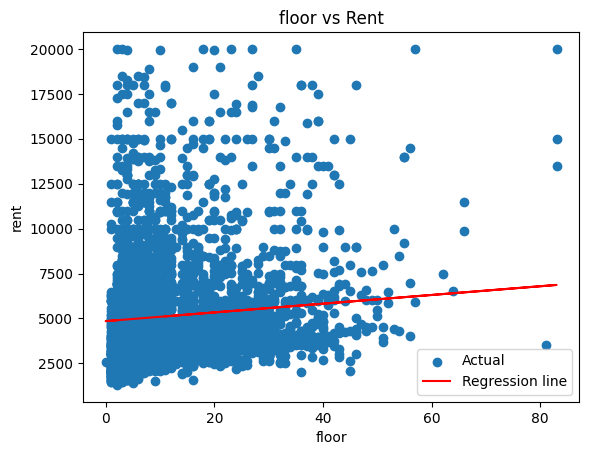

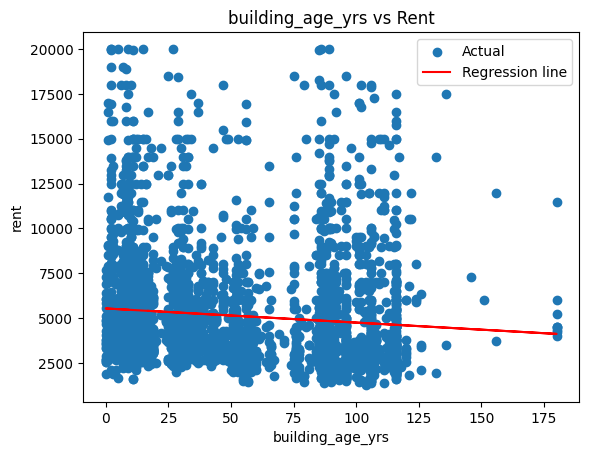

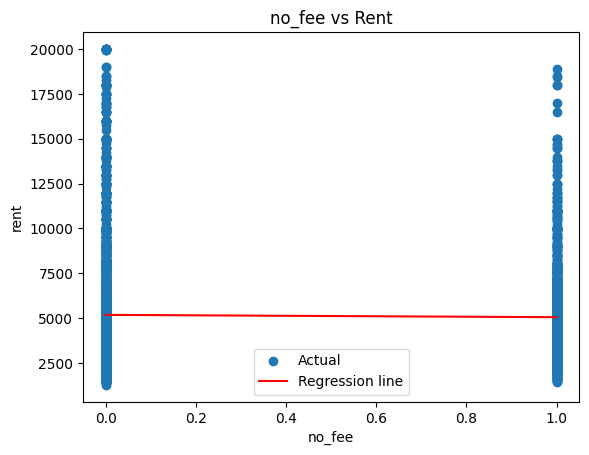

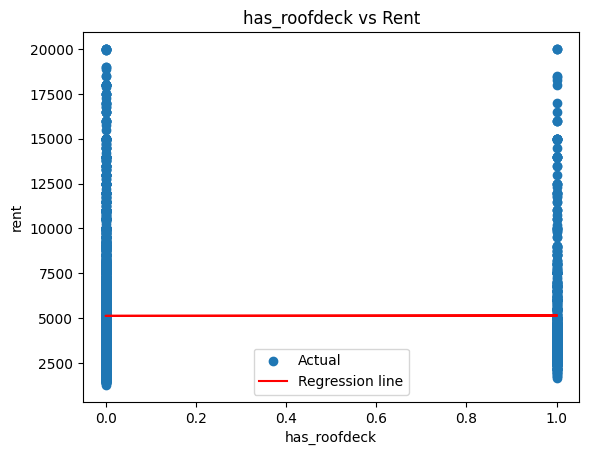

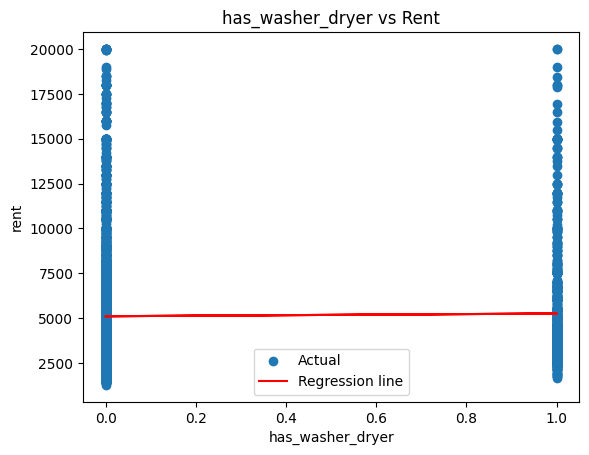

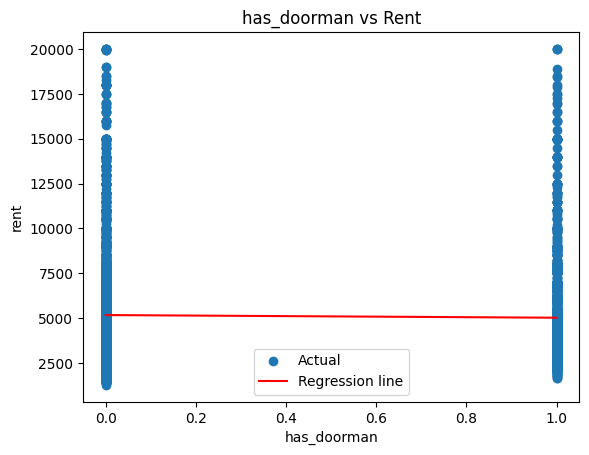

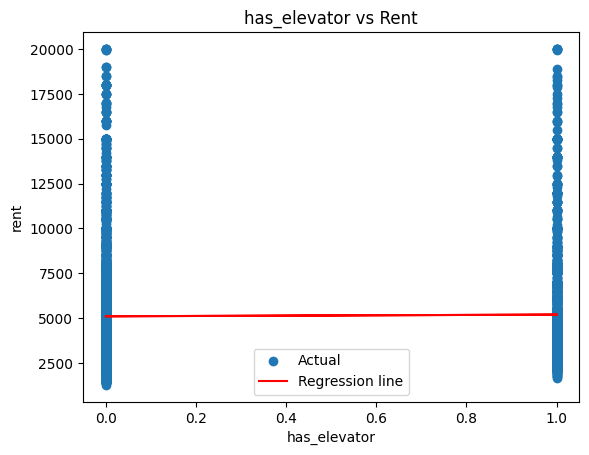

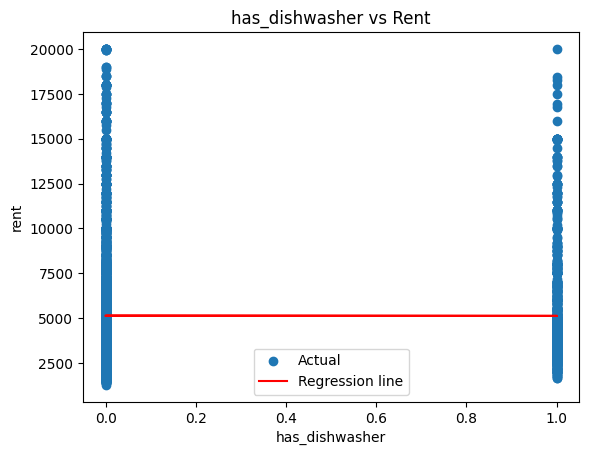

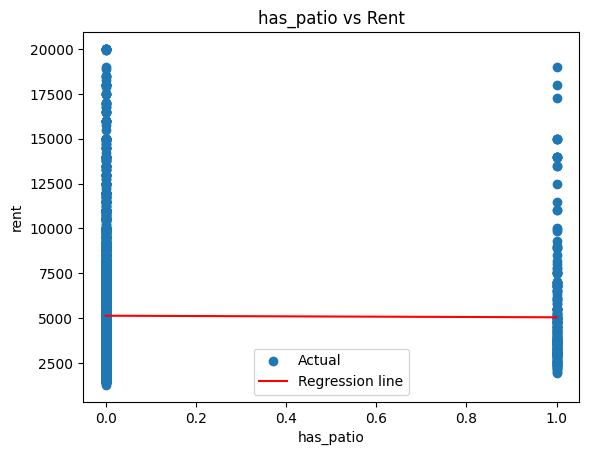

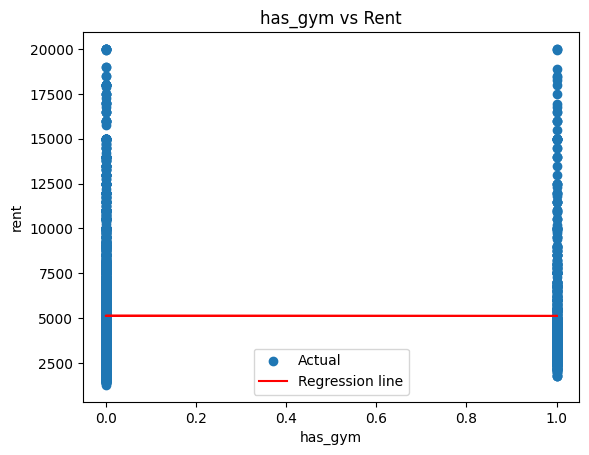

In [ ]:
for i in x:
    plt.scatter(df[i], y, label='Actual')

    X_line = x.copy()
    for col in x.columns:
        if col != i:
            X_line[col] = X_line[col].mean()
    y_pred_line = final_model.predict(X_line)

    plt.plot(df[i], y_pred_line, color='red', label='Regression line')
    plt.xlabel(i)
    plt.ylabel('rent')
    plt.title(f'{i} vs Rent')
    plt.legend()
    plt.show()

git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/obirikan/Rent-Prediction.git
git push -u origin main